<a href="https://colab.research.google.com/github/HwangJae-won/Data_project_practice/blob/main/1001_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data & EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/데이터분석코테/Data/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

결측치는 존재하지 않음

In [ ]:
#데이터 중복 확인
df.duplicated().sum()

0

데이터 내 중복 값도 존재하지 않음

In [ ]:
#id는 분석에 필요 없을 것 같으므로 제외
df.drop(["id"], axis=1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#target 변수인 diagnosis
# M - Malignant B - Benign
df['diagnosis'] = df['diagnosis'].map({'M':0, 'B':1})

In [ ]:
#target 변수의 class ratio 확인
df.diagnosis.value_counts()/len(df)

1    0.627417
0    0.372583
Name: diagnosis, dtype: float64

6:4 정도의 비율 => 불균형 비율이 크지는 않지만 resampling하여 균형 맞춰준 후 성능 비교해보자

In [ ]:
corr= df.corr()
corr["diagnosis"].sort_values(ascending =True)

concave points_worst      -0.793566
perimeter_worst           -0.782914
concave points_mean       -0.776614
radius_worst              -0.776454
perimeter_mean            -0.742636
area_worst                -0.733825
radius_mean               -0.730029
area_mean                 -0.708984
concavity_mean            -0.696360
concavity_worst           -0.659610
compactness_mean          -0.596534
compactness_worst         -0.590998
radius_se                 -0.567134
perimeter_se              -0.556141
area_se                   -0.548236
texture_worst             -0.456903
smoothness_worst          -0.421465
symmetry_worst            -0.416294
texture_mean              -0.415185
concave points_se         -0.408042
smoothness_mean           -0.358560
symmetry_mean             -0.330499
fractal_dimension_worst   -0.323872
compactness_se            -0.292999
concavity_se              -0.253730
fractal_dimension_se      -0.077972
symmetry_se                0.006522
texture_se                 0

<Axes: >

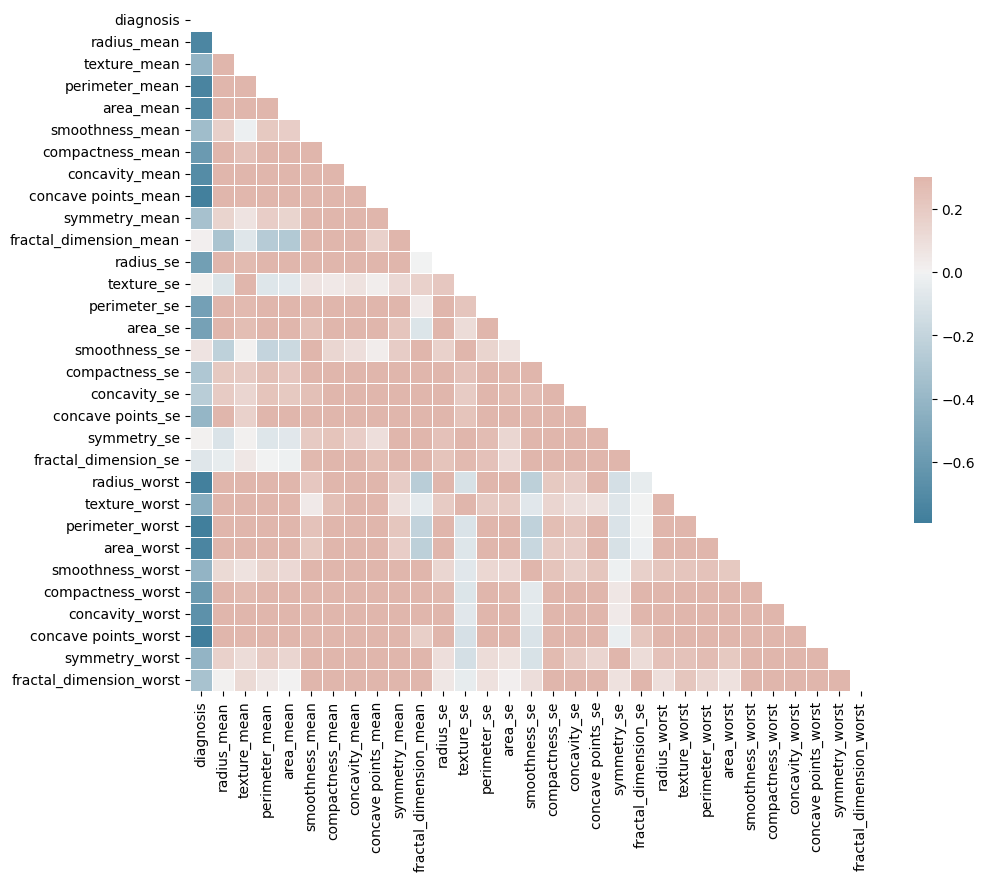

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

대부분 음의 상관 관계를 가지고 있음을 확인할 수 있음

## Feature Engineering

In [ ]:
X = df.drop(["diagnosis"], axis= 1)
y = df.diagnosis

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train 데이터에만 smote 적용하여 성능 비교

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train,list(y_train))

해당 데이터에는 categorical 변수가 없음!

In [ ]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
t = StandardScaler()
t

StandardScaler()

In [ ]:
X_train_scaled = t.fit_transform(X_train)
X_test_scaled = t.transform(X_test)

In [ ]:
y_train

68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Name: diagnosis, Length: 455, dtype: int64

# Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score

In [ ]:
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
XGB = XGBClassifier()

In [ ]:
models = [DTR,RFR,KNR,KNR,XGB]
result=[]
d = {}
for model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy =accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    ba = balanced_accuracy_score(y_test, y_pred)

    print(model,"=> Accuracy: ",accuracy, "F1: ", f1, "BA:", "ba" )
    result.append((model, accuracy, f1))

DecisionTreeClassifier() => Accuracy:  0.9385964912280702 F1:  0.951048951048951 BA: ba
RandomForestClassifier() => Accuracy:  0.9649122807017544 F1:  0.9722222222222222 BA: ba
KNeighborsClassifier() => Accuracy:  0.9473684210526315 F1:  0.9577464788732394 BA: ba
KNeighborsClassifier() => Accuracy:  0.9473684210526315 F1:  0.9577464788732394 BA: ba
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_esti

In [ ]:
#model 정의
models = {
    'RandomForest': (RandomForestClassifier(),
                 {
                     'n_estimators': [50, 200],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 }),
    'LightGBM': (LGBMClassifier(),
                {
                     'n_estimators': [50, 200],
                     'max_depth': [2, 20],
                     'min_child_samples':[5, 100],
                }),
    'GB': (GradientBoostingClassifier(),
                 {
                     'n_estimators': [50, 200],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 }),
    'ExtraTree': (ExtraTreesClassifier(),
                  {
                     'n_estimators': [50, 200],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 })
}

In [ ]:
model_results = []

# 모델별로 튜닝 및 적합
for model_name, (model, param_grid) in models.items():
    print(f"Start {model_name} Training!")
    search = GridSearchCV(model, param_grid, scoring='accuracy',  n_jobs=-1)
    search.fit(X_train_scaled, y_train)

    # 최적의 모델과 하이퍼파라미터 출력
    best_model =search.best_estimator_
    best_params =search.best_params_
    print(f"Best Parameters: {best_params}")

    # 테스트 데이터에 대한 예측 및 평가
    y_pred = best_model.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    ba = balanced_accuracy_score(y_test, y_pred)
    print(f"F1 score: {f1}\n")
    print(f"Accuracy: {accuracy}\n")
    print(f"BA: {ba}\n")


    # 모델 이름과 accuracy 결과 저장
    model_results.append((model_name, accuracy, f1, ba))

Start RandomForest Training!
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
F1 score: 0.9722222222222222

Accuracy: 0.9649122807017544

BA: 0.9580740255486406

Start LightGBM Training!
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [ ]:
model_results

[('RandomForest', 0.9649122807017544, 0.9722222222222222),
 ('LightGBM', 0.9736842105263158, 0.979020979020979),
 ('GB', 0.956140350877193, 0.965034965034965),
 ('ExtraTree', 0.9736842105263158, 0.979020979020979)]

최종 0.979 BA 나온 LGBM 선택

---
smote 적용한 모델링 => XXXX 성능 오히려 떨어짐

In [ ]:
models = [DTR,RFR,KNR,KNR,XGB]
result=[]
d = {}
for model in models:
    model.fit(X_train_sm, y_train_sm )
    y_pred = model.predict(X_test_scaled)
    accuracy =accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(model,"=> Accuracy: ",accuracy, "F1: ", f1 )
    result.append((model, accuracy, f1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


DecisionTreeClassifier() => Accuracy:  0.631578947368421 F1:  0.6956521739130436


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier() => Accuracy:  0.7192982456140351 F1:  0.813953488372093
KNeighborsClassifier() => Accuracy:  0.6228070175438597 F1:  0.7675675675675676
KNeighborsClassifier() => Accuracy:  0.6228070175438597 F1:  0.7675675675675676
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) => Accu

In [ ]:
model_results = []

# 모델별로 튜닝 및 적합
for model_name, (model, param_grid) in models.items():
    print(f"Start {model_name} Training!")
    search = GridSearchCV(model, param_grid, scoring='accuracy',  n_jobs=-1)
    search.fit(X_train_sm, y_train_sm)

    # 최적의 모델과 하이퍼파라미터 출력
    best_model =search.best_estimator_
    best_params =search.best_params_
    print(f"Best Parameters: {best_params}")

    # 테스트 데이터에 대한 예측 및 평가
    y_pred = best_model.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"F1 score: {f1}\n")
    print(f"Accuracy: {accuracy}\n")


    # 모델 이름과 accuracy 결과 저장
    model_results.append((model_name, accuracy, f1))

Start RandomForest Training!
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
F1 score: 0.7865168539325842

Accuracy: 0.6666666666666666

Start LightGBM Training!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 286
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5718
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
F1 score: 0.7675675675675676

Accuracy: 0.6228070175438597



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
